# Fraud Detection DATA 1

In [4]:
#http://colingorrie.github.io/outlier-detection.html#z-score-method

# Importing the Keras libraries and packages
#from keras.models import Sequential
#from keras.layers import Dense, Dropout
#from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

import matplotlib.patches as mpatches
import pandas as pd
import time
#from sklearn.manifold  import TSNE
from sklearn.decomposition import PCA

import random
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

#from diversipy import *
#import umap
from mpl_toolkits.mplot3d import Axes3D

#import umap.umap_ as umap
#data=pd.read_csv('/Users/akrim/Desktop/Fraud Detection Python/creditcardcsvpresent.csv') 
#data1 = pd.read_csv('/Users/akrim/Desktop/Fraud Detection Python/creditcardcsvpresent.csv') 
#data2 = pd.read_csv('/Users/akrim/Desktop/Fraud Detection Python/frauddetectiontrainingdatasetcsv.csv1.csv')


In [5]:
#!pip install jupyterthemes
#!pip install nodejs

In [6]:
def prep_data(data) : 
    data_bis = data
    print(data.columns)
    print(data.shape)
    display(data.head(5)) 
    
    #Calcul Pctage d'individus frauduleux
    Pctage_Fraud=(len(data[data.iloc[:,-1]>0])/len(data))*100
    #print("Le pourcentage d'individus frauduleux dans notre dataset est de", round(Pctage_Fraud,1),"%")
    print("Le pourcentage d'individus frauduleux dans notre dataset est de : %.2f " % (Pctage_Fraud), 
          "%, soit", len(data[data.iloc[:,-1]>0]), "individus frauduleux.")
    
    # Differentiate numerical features (minus the target) and categorical features
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print("Numerical features : " + str(len(numerical_features)))
    print("Categorical features : " + str(len(categorical_features)))
    
    #if numerical_transformation = True : ou if len(Categorical Features) !=0
    #...
    Target=data.iloc[:,-1]
    data = data.drop([data.columns[-1]], axis=1) #retire la derniere colonne
    data = data.drop([data.columns[0]], axis=1) #retire la colonne 'Time'
    
    #Standardisation de nos données (centrées réduites)
    scaler2 = StandardScaler()
    data_temp=pd.DataFrame(scaler2.fit_transform(data.loc[:,:]))#["Amount"]]))
    data_std=data.copy()
    data_std.loc[:,:]=data_temp.values
    
    #Normalisation de nos données 
    scaler = MinMaxScaler()
    #data_nrm=pd.DataFrame(scaler.fit_transform(data))
    data_temp2=pd.DataFrame(scaler.fit_transform(data.loc[:,:]))
    data_nrm=data.copy()
    data_nrm.loc[:,:]=data_temp2.values
    
    #data_nrm.columns=data.columns
    
    display(data_std.head(5))
    display(data_nrm.head(5))
    return data_std, data_nrm, Target

    

In [7]:
def viz_data(data_init, data, n_comp, Target) :
    # PCA Implementation
    t0 = time.time()
    pca = PCA(n_components=n_comp, random_state=42)
    X_reduced_pca = pca.fit_transform(data.values)
    t1 = time.time()
    print("PCA took {:.2} s".format(t1 - t0))
    
    X_reduced_pca = pd.DataFrame(X_reduced_pca)
    X_fraud_pca=np.array(X_reduced_pca.loc[np.array(data_init.Class)==1])  #pbs au niveau de l'index...
    X_no_fraud_pca=np.array(X_reduced_pca.loc[np.array(data_init.Class)==0])
    features = range(pca.n_components_)
    print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())
    

    # Umap Implementation
    t0 = time.time()
    reducer = umap.UMAP(n_components=3, random_state=42,n_epochs=300, min_dist=0.001, n_neighbors=1000)
    embedding = reducer.fit_transform(data_std)
    t1 = time.time()
    print("UMAP took {:.2} s".format(t1 - t0))
    
    embedding = pd.DataFrame(embedding)
    X_fraud_umap=np.array(embedding.loc[np.array(data_init.Class)==1])
    X_no_fraud_umap=np.array(embedding.loc[np.array(data_init.Class)==0])

    
    
    #Plot
    
    fig = plt.figure(figsize=(24,6))
    fig.suptitle('Clusters using Dimensionality Reduction', fontsize=20)

    y= Target
    blue_patch = mpatches.Patch(color='green', label='No Fraud')
    red_patch = mpatches.Patch(color='red', label='Fraud')




    # PCA scatter plot
    ax2=fig.add_subplot(1, 2, 1, projection='3d')

    ax2.scatter(X_reduced_pca[np.array(Target)==0][0], X_reduced_pca[np.array(Target)==0][1], X_reduced_pca[np.array(Target)==0][2], c='g', marker='o')
    ax2.scatter(X_reduced_pca[np.array(Target)==1][0], X_reduced_pca[np.array(Target)==1][1], X_reduced_pca[np.array(Target)==1][2], c='r', marker='^')
    ax2.set_title('PCA', fontsize=14)
    ax2.grid(True)
    ax2.legend(handles=[blue_patch, red_patch])

    
    
    # UMAP scatter plot
    ax1=fig.add_subplot(1, 2, 2, projection='3d')
    ax1.scatter(embedding[np.array(Target)==0][0],embedding[np.array(Target)==0][1],embedding[np.array(Target)==0][2], c='g', marker = "^");
    ax1.scatter(embedding[np.array(Target)==1][0],embedding[np.array(Target)==1][1],embedding[np.array(Target)==1][2], c='r', marker = "o");
    ax1.set_title('UMAP', fontsize=14)

    ax1.grid(True)

    ax1.legend(handles=[blue_patch, red_patch])

    

    plt.show()
    return embedding

In [3]:
data3 = pd.read_csv("creditcard 2.csv")
data4 = data3.drop(data3.index[data.index])

NameError: name 'pd' is not defined

In [8]:
data.shape

(204807, 31)

In [11]:
#https://umap-learn.readthedocs.io/en/latest/basic_usage.html#iris-data
data = pd.read_csv("creditcard.csv")
#data = pd.read_csv("/Users/akrim/Downloads/creditcard 2.csv")
#data = data.drop(data.columns[19:29], axis=1)
len_df = data[data.Class==0].shape[0]

#randomly sample 50000 rows

#data[data.Class==0].sample(frac=0.2)
random.seed(1)
data_train = data[data.Class==0].sample(n=80000)
data_used = data.drop(data.index[data_train.index])

df1 = data_used[data_used.Class==0].sample(n=15000)
df2 = data_used[data_used.Class==1]
data = pd.DataFrame(pd.concat([df1,df2]))

data_bis2 = data

data_std, data_nrm, Target = prep_data(data)
#embedding = viz_data(data,data_std, 3, Target)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(15492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
50159,44375.0,-0.501461,1.033110,-0.771843,-0.751694,2.387837,3.243995,-0.033690,1.193944,-1.075520,-0.441131,-0.369308,-0.193099,-0.012690,0.840162,1.067687,0.074680,-0.362372,0.266819,1.078921,0.037373,0.042984,-0.121933,-0.164842,1.042539,-0.037219,0.407771,-0.034320,0.060322,2.50,0
154678,102556.0,-0.121865,0.845990,1.140205,0.044012,0.271521,-0.786730,0.601516,-0.202985,0.890406,-0.757596,0.281810,-2.861960,1.224448,1.873817,0.433861,-0.104854,0.583561,-0.256743,0.771315,-0.020653,-0.496925,-1.275020,0.265857,-0.124667,-1.144067,0.105936,0.095161,0.175429,12.08,0
228087,145355.0,-0.327123,1.028451,-0.698173,-0.783012,1.138027,-0.297648,0.764887,0.091936,0.075245,-0.228865,0.666249,0.164388,-0.604526,-0.829770,-0.768727,0.576380,0.054016,0.359579,0.115727,0.069682,-0.343488,-0.823398,0.177247,0.094862,-0.368996,0.121520,0.205445,0.121983,0.89,0
139024,82969.0,-0.641516,0.740559,1.819383,-1.181768,-0.433095,-1.270845,0.603549,-0.033709,0.061569,-0.714904,-0.308359,-0.297780,-0.737749,0.104340,0.558123,0.536971,-0.516981,-0.368861,-0.806332,-0.008220,-0.064958,-0.182915,-0.010978,0.726218,-0.407229,0.700886,0.252187,0.176762,8.76,0
36045,38375.0,-12.320863,-8.782818,-3.362845,1.116188,-5.117401,2.522210,3.616290,-0.469529,0.826156,0.875103,1.500792,0.332644,0.559253,-1.081637,-0.048095,2.290383,0.526709,-2.213866,0.642120,-6.037317,-1.826445,0.573806,-0.402723,0.123906,0.695703,-0.437249,-2.817798,3.252350,628.75,0


Le pourcentage d'individus frauduleux dans notre dataset est de : 3.18  %, soit 492 individus frauduleux.
Numerical features : 31
Categorical features : 0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
50159,-0.147342,0.477107,-0.238839,-0.516927,1.409295,2.359090,0.055963,0.735194,-0.803219,-0.162297,-0.374706,0.001334,-0.016358,0.620955,1.174805,0.152945,-0.083759,0.321875,1.247666,0.048214,0.019503,-0.153909,-0.227770,1.736297,-0.084156,0.836072,-0.076272,0.144195,-0.330197
154678,0.008460,0.380415,0.595622,-0.039121,0.215799,-0.531974,0.370069,-0.135811,0.769453,-0.350669,0.128360,-1.599026,1.219799,1.231598,0.483064,0.014780,0.425673,-0.184487,0.882639,-0.020612,-0.534312,-1.680481,0.403879,-0.209354,-2.176875,0.210497,0.191884,0.440733,-0.294516
228087,-0.075786,0.474699,-0.206688,-0.535733,0.704465,-0.181177,0.450856,0.048077,0.117352,-0.035949,0.425385,0.215698,-0.607725,-0.365577,-0.829409,0.539038,0.140487,0.411587,0.104674,0.086537,-0.376923,-1.082578,0.273926,0.156586,-0.711446,0.242796,0.420282,0.303046,-0.336193
139024,-0.204826,0.325935,0.892030,-0.775178,-0.181568,-0.879208,0.371075,-0.030265,0.106412,-0.325257,-0.327615,-0.061437,-0.740843,0.186260,0.618680,0.508710,-0.167023,-0.292922,-0.989503,-0.005864,-0.091220,-0.234643,-0.002118,1.209012,-0.783734,1.443575,0.517085,0.444166,-0.306881
36045,-4.998510,-4.595133,-1.369609,0.604699,-2.823281,1.841385,1.860863,-0.302005,0.718055,0.621175,1.070168,0.316591,0.555131,-0.514370,-0.042930,1.858085,0.395056,-2.077315,0.729327,-7.157105,-1.898074,0.767180,-0.576639,0.205000,1.301579,-0.915296,-5.840882,8.367479,2.002258


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
50159,0.940511,0.709769,0.869937,0.232847,0.568895,0.530731,0.558995,0.691846,0.578257,0.658684,0.237352,0.823104,0.469319,0.791516,0.539162,0.693523,0.764018,0.734857,0.524887,0.498422,0.456808,0.508150,0.546698,0.604525,0.569845,0.425158,0.415658,0.351684,0.000284
154678,0.948213,0.707186,0.924776,0.276823,0.533977,0.426511,0.567153,0.668965,0.670243,0.650052,0.277437,0.704300,0.619118,0.832313,0.477772,0.684757,0.793160,0.695459,0.492504,0.497189,0.446010,0.441301,0.555301,0.422629,0.460115,0.359261,0.421867,0.356328,0.001374
228087,0.944048,0.709705,0.872050,0.231116,0.548274,0.439157,0.569251,0.673795,0.632102,0.664474,0.301104,0.839017,0.397656,0.725607,0.361294,0.718018,0.776846,0.741838,0.423487,0.499109,0.449078,0.467483,0.553531,0.456840,0.536954,0.362663,0.427155,0.354171,0.000101
139024,0.937669,0.705731,0.944256,0.209078,0.522352,0.413994,0.567179,0.671737,0.631462,0.651216,0.241104,0.818444,0.381524,0.762474,0.489808,0.716094,0.759256,0.687023,0.326417,0.497454,0.454649,0.504615,0.549771,0.555230,0.533163,0.489150,0.429396,0.356381,0.000997
36045,0.700696,0.574267,0.795626,0.336079,0.445064,0.512068,0.605873,0.664599,0.667237,0.694588,0.352480,0.846507,0.538573,0.715666,0.431092,0.801703,0.791408,0.548186,0.478903,0.369348,0.419419,0.548485,0.541946,0.461366,0.642505,0.240673,0.282193,0.480466,0.071528


In [12]:
data_std.shape

(15492, 29)

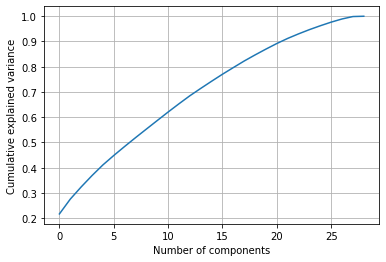

 Le nombre de dimensions à conserver (entre 1 et 10): 10
PCA took 0.066 s
Explained variance: 0.5863
 Garder ce nombre de dimensions ? (Y or N)Y


In [13]:
# PCA Implementation

pca_test = PCA().fit(data_std.values)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.rcParams['figure.figsize']=(16,8)
plt.grid(True)
plt.show()


nb_pc = input(' Le nombre de dimensions à conserver (entre 1 et 10): ')
nb_pc = int(nb_pc)

t0 = time.time()
pca_final = PCA(n_components=nb_pc, random_state=42)
X_reduced_pca = pca_final.fit_transform(data_std.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))
features = range(pca_final.n_components_)
print('Explained variance: %.4f' % pca_final.explained_variance_ratio_.sum())

ans = input(' Garder ce nombre de dimensions ? (Y or N)')

while ans!='Y' :
    del(pca_final)
    del(nb_pc)
    nb_pc = input(' Le nombre de dimensions à conserver (entre 1 et 10): ')
    nb_pc = int(nb_pc)

    t0 = time.time()
    pca_final = PCA(n_components=nb_pc, random_state=42)
    X_reduced_pca = pca_final.fit_transform(data_std.values)
    t1 = time.time()
    print("PCA took {:.2} s".format(t1 - t0))
    features = range(pca_final.n_components_)
    print('Explained variance: %.4f' % pca_final.explained_variance_ratio_.sum())
    ans = input(' Garder ce nombre de dimensions ? (Y or N)')

data_std_reduced=pd.DataFrame(X_reduced_pca)


# Data Standardized Reduced

In [9]:
data_std_reduced = data_std

In [7]:
data_std.shape

(284807, 29)

In [11]:
dst = pd.read_csv('distances2_DBSCAN_DATA1.csv')

In [18]:
from scipy.spatial import distance_matrix
from sklearn.metrics import pairwise_distances
#a=pairwise_distances(data_std.iloc[0:2,:],data_std.iloc[0:,:])
#np.fill_diagonal(a, np.nan)


In [19]:
a=pairwise_distances(data_std.iloc[0:1,:],data_std.iloc[0:,:])
np.fill_diagonal(a, np.nan)

In [28]:
len(a[a<0.4])

0

In [21]:
dst = pd.DataFrame(np.zeros((data_std.shape[0], 3)),columns = ['Min', 'Max', 'Mean'], dtype='float')

In [22]:
t0 = time.time()
batch = 500
#dists = pairwise_distances(data_std.iloc[0:batch,:],data_std.iloc[0:,:])
#dists[0,0] = np.nan

for i in range(0, data_std.shape[0], batch) :#data_std.shape[0]
    #print(pairwise_distances(data_std.iloc[0:1,:],data_std.iloc[0:,:]))
    #print(i)                          
    #print(data_std.iloc[i:i+batch,:].shape)
    
    #dists = pairwise_distances(data_std.iloc[i:i+batch,:],data_std.iloc[0:,:])
    
    #dists = np.append(dists,pairwise_distances(data_std.iloc[i:i+batch,:],data_std.iloc[0:,:]), axis=0)
    
    dists = pairwise_distances(data_std.iloc[i:i+batch,:],data_std.iloc[0:,:])
    #np.fill_diagonal(dists, np.nan)
    
    for j in range(0,dists.shape[0]) :
        dists[j,i+j] = np.nan  #en gros je decale la diag
    
    dst.loc[i:i+batch-1,'Min'] = np.nanmin(dists, axis=1) 
    dst.loc[i:i+batch-1,'Max'] = np.nanmax(dists, axis=1) 
    dst.loc[i:i+batch-1,'Mean'] = np.nanmean(dists, axis=1)
    
    
t1 = time.time()
print("PCA took {:.3} s".format(t1 - t0))

PCA took 4.34 s


In [23]:
dst.to_csv('distances2_DBSCAN_DATA1.csv', index=False)


In [24]:
from scipy.spatial import distance_matrix
from sklearn.metrics import pairwise_distances

temp_pca=pairwise_distances(data_std_reduced)
#distance_matrix(data_std,data_std,2)
for i in range(0,(data_std).shape[0]) :
    temp_pca[i,i] = np.nan

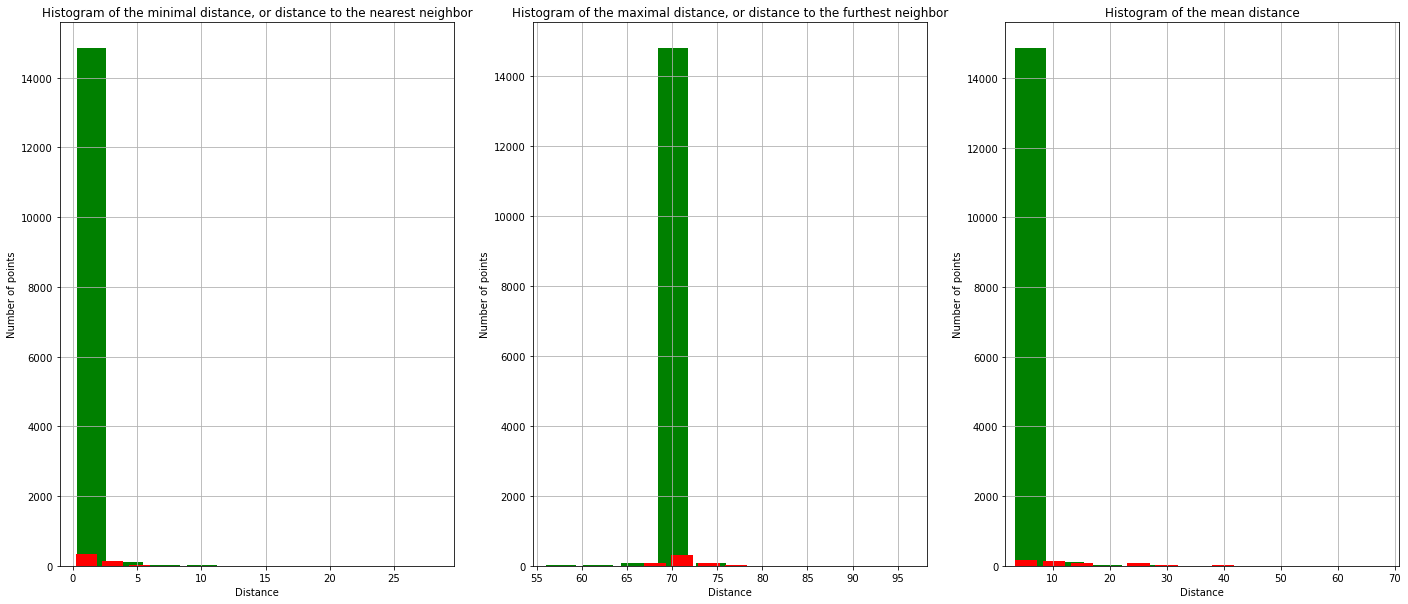

In [25]:
matrix_min_pca = np.nanmin(temp_pca, axis=0) #0 means row, 1 means column
matrix_max_pca = np.nanmax(temp_pca, axis=0)
matrix_mean_pca = np.nanmean(temp_pca, axis=0)

fig, axs = plt.subplots(1, 3,  figsize=(24,10))

# We can set the number of bins with the `bins` kwarg
axs[0].hist(matrix_min_pca[np.array(Target)==0], bins = 10,color='g',alpha=1, rwidth=0.80)
axs[0].hist(matrix_min_pca[np.array(Target)==1], bins = 10,color='r',alpha=1, rwidth=0.80)

axs[0].set_xlim(min(matrix_min_pca)-1, max(matrix_min_pca)+1)
#axs[0].set_ylim(0,500)
#axs[0].set_xlim(0,10)

axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Number of points')
axs[0].set_title('Histogram of the minimal distance, or distance to the nearest neighbor')
axs[0].grid(True)


axs[1].hist(matrix_max_pca[np.array(Target)==0], bins = 10,color='g',alpha=1, rwidth=0.80)
axs[1].hist(matrix_max_pca[np.array(Target)==1], bins = 10,color='r',alpha=1, rwidth=0.80)

#axs[1].set_ylim(0,500)
axs[1].set_xlabel('Distance')
axs[1].set_xlim(min(matrix_max_pca)-1, max(matrix_max_pca)+1)
axs[1].set_ylabel('Number of points')
axs[1].set_title('Histogram of the maximal distance, or distance to the furthest neighbor')
axs[1].grid(True)

axs[2].hist(matrix_mean_pca[np.array(Target)==0], bins = 10,color='g',alpha=1, rwidth=0.80)
axs[2].hist(matrix_mean_pca[np.array(Target)==1], bins = 10,color='r',alpha=1, rwidth=0.80)

#axs[2].set_ylim(0,500)
axs[2].set_xlim(min(matrix_mean_pca)-1, max(matrix_mean_pca)+1)
axs[2].set_xlabel('Distance')
axs[2].set_ylabel('Number of points')
axs[2].set_title('Histogram of the mean distance')
axs[2].grid(True)

plt.show()

In [17]:
#regroupés entre eux, avec des outliers éloignés, zones à faible densité

In [16]:
#une séparation entre outliers et inliers, une frontière, une distinction (mean distance)

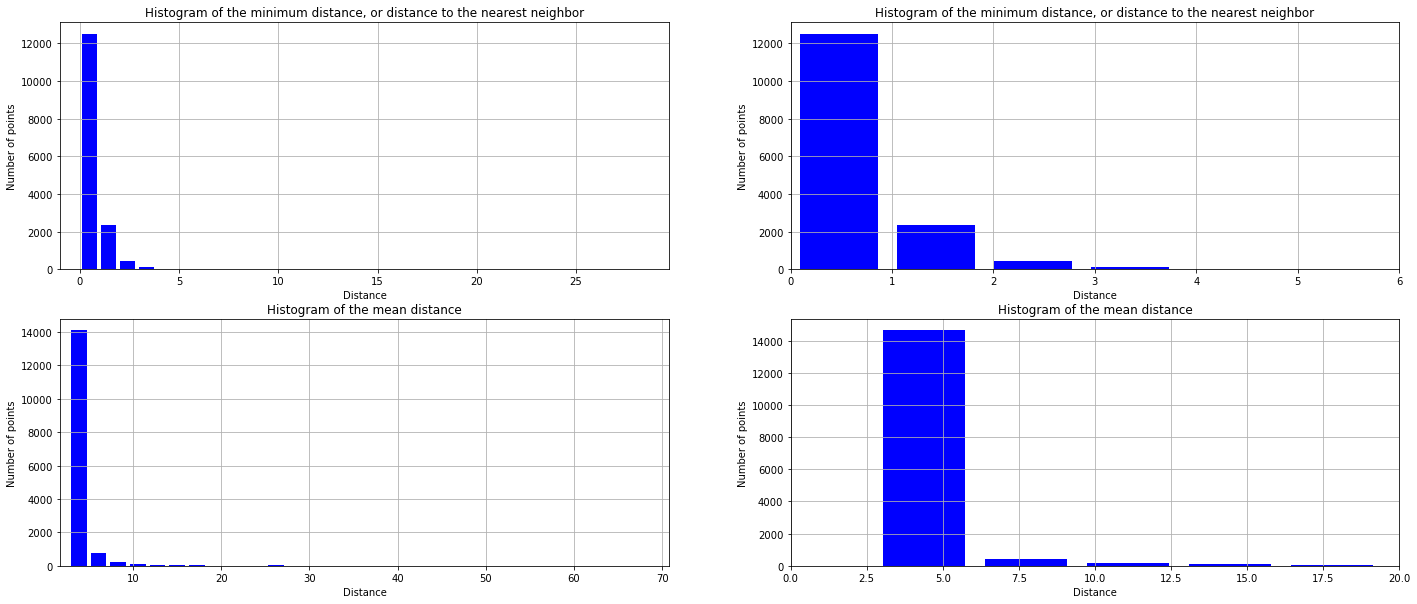

In [26]:
#matrix_min_pca = dst.Min.values#np.nanmin(temp_pca, axis=0) #0 means row, 1 means column
#matrix_max_pca = dst.Max.values#np.nanmax(temp_pca, axis=0)
#matrix_mean_pca = dst.Mean.values#np.nanmean(temp_pca, axis=0)

fig, axs = plt.subplots(2, 2,  figsize=(24,10))

# We can set the number of bins with the `bins` kwarg
axs[0,0].hist(matrix_min_pca, bins = 30, color='b',alpha=1, rwidth=0.80)

axs[0,0].set_xlim(min(matrix_min_pca)-1, max(matrix_min_pca)+1)

axs[0,0].set_xlabel('Distance')
axs[0,0].set_ylabel('Number of points')
axs[0,0].set_title('Histogram of the minimum distance, or distance to the nearest neighbor')
axs[0,0].grid(True)

# We can set the number of bins with the `bins` kwarg
axs[0,1].hist(matrix_min_pca, bins = 30,color='b',alpha=1, rwidth=0.80)

axs[0,1].set_xlim(min(matrix_min_pca)-1, max(matrix_min_pca)+1)
#axs[0,1].set_ylim(0,500)
axs[0,1].set_xlim(0,6)

axs[0,1].set_xlabel('Distance')
axs[0,1].set_ylabel('Number of points')
axs[0,1].set_title('Histogram of the minimum distance, or distance to the nearest neighbor')
axs[0,1].grid(True)


axs[1,0].hist(matrix_mean_pca, bins = 30,color='b',alpha=1, rwidth=0.80)

#axs[1,1].set_ylim(0,500)
axs[1,0].set_xlim(min(matrix_mean_pca)-1, max(matrix_mean_pca)+1)
axs[1,0].set_xlabel('Distance')
axs[1,0].set_ylabel('Number of points')
axs[1,0].set_title('Histogram of the mean distance')
axs[1,0].grid(True)


axs[1,1].hist(matrix_mean_pca, bins = 20,color='b',alpha=1, rwidth=0.80)

#axs[1,1].set_ylim(0,500)
axs[1,1].set_xlim(0,20)

#axs[1,1].set_xlim(min(matrix_mean_pca)-1, max(matrix_mean_pca)+1)
axs[1,1].set_xlabel('Distance')
axs[1,1].set_ylabel('Number of points')
axs[1,1].set_title('Histogram of the mean distance')
axs[1,1].grid(True)

plt.show()

In [27]:
expectation = len(matrix_mean_pca[matrix_mean_pca>=8])

In [28]:
expectation #soit 1%

512

La majorité des points se trouvent à une distance d'au plus de 3 unités de leur plus proche voisin. Ainsi, 3 serait une distance raisonnable pour le paramètre epsilon (DBSCAN notamment).

In [29]:
from sklearn.neighbors import radius_neighbors_graph
A = radius_neighbors_graph(data_std_reduced, 3, mode='connectivity', p=2, include_self=False)

In [36]:
nb_neighb

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
nb_neighb = np.zeros((data_std.shape[0]))
t0 = time.time()

distance = []
for i in range(274800, data_std.shape[0]) :#data_std.shape[0]
    
    
    distance = pairwise_distances(data_std.iloc[i:i+1,:],data_std.iloc[0:,:])
    distance[0][i] = np.nan
    nb_neighb.iloc[i,:] = len(distance[distance<=0.4])
    
    
t1 = time.time()
print("PCA took {:.3} s".format(t1 - t0))

PCA took 0.0 s


In [7]:
nb_neighb = pd.read_csv('neighb_DBSCAN_DATA1.csv')

In [27]:
#pd.DataFrame(nb_neighb).to_csv('neighb_DBSCAN_DATA1.csv', index=False)


In [37]:
# nb_neighb = pd.read_csv('neighb_DBSCAN_DATA1.csv')
nbr_neighb = np.array(nb_neighb)
print("Le vecteur de nbre de voisins se répartit de la sorte :", np.percentile(np.array(nbr_neighb), [1, 25, 50, 75, 90, 95]))


Le vecteur de nbre de voisins se répartit de la sorte : [0. 0. 0. 0. 0. 0.]


In [33]:
#matrix_nearest_neighb = A.toarray()
#nbr_neighb = sum(matrix_nearest_neighb)

nbr_neighb = np.array(nb_neighb)

fig, ax = plt.subplots(1, 1,  figsize=(24,10))

ax.hist(nbr_neighb,alpha=1, rwidth=0.80)


#ax.set_ylim(0,500)
ax.set_xlabel('Number of nearest neighbours')
ax.set_ylabel('Number of points')
ax.set_title('Number of points within distance epsilon = 0.5')
ax.grid(True)
plt.show()

NameError: name 'nb_neighb' is not defined

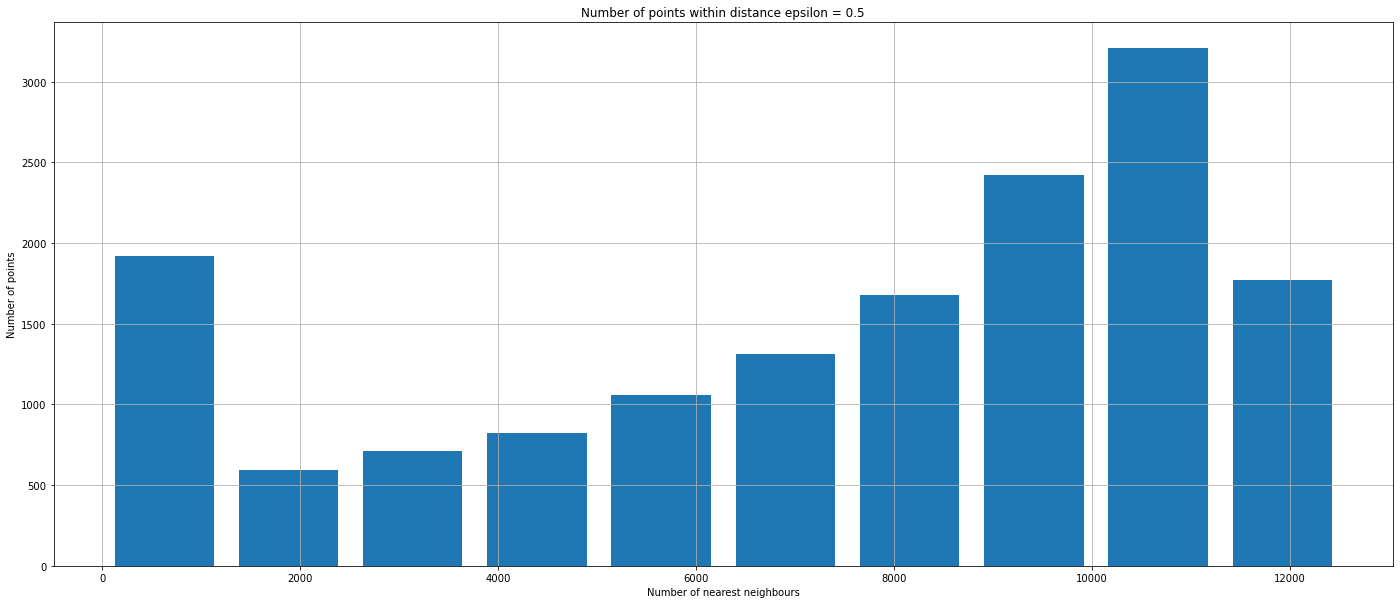

In [38]:
matrix_nearest_neighb = A.toarray()
nbr_neighb = sum(matrix_nearest_neighb)

#nbr_neighb = np.array(nb_neighb)

fig, ax = plt.subplots(1, 1,  figsize=(24,10))

ax.hist(nbr_neighb,alpha=1, rwidth=0.80)


#ax.set_ylim(0,500)
ax.set_xlabel('Number of nearest neighbours')
ax.set_ylabel('Number of points')
ax.set_title('Number of points within distance epsilon = 0.5')
ax.grid(True)
plt.show()

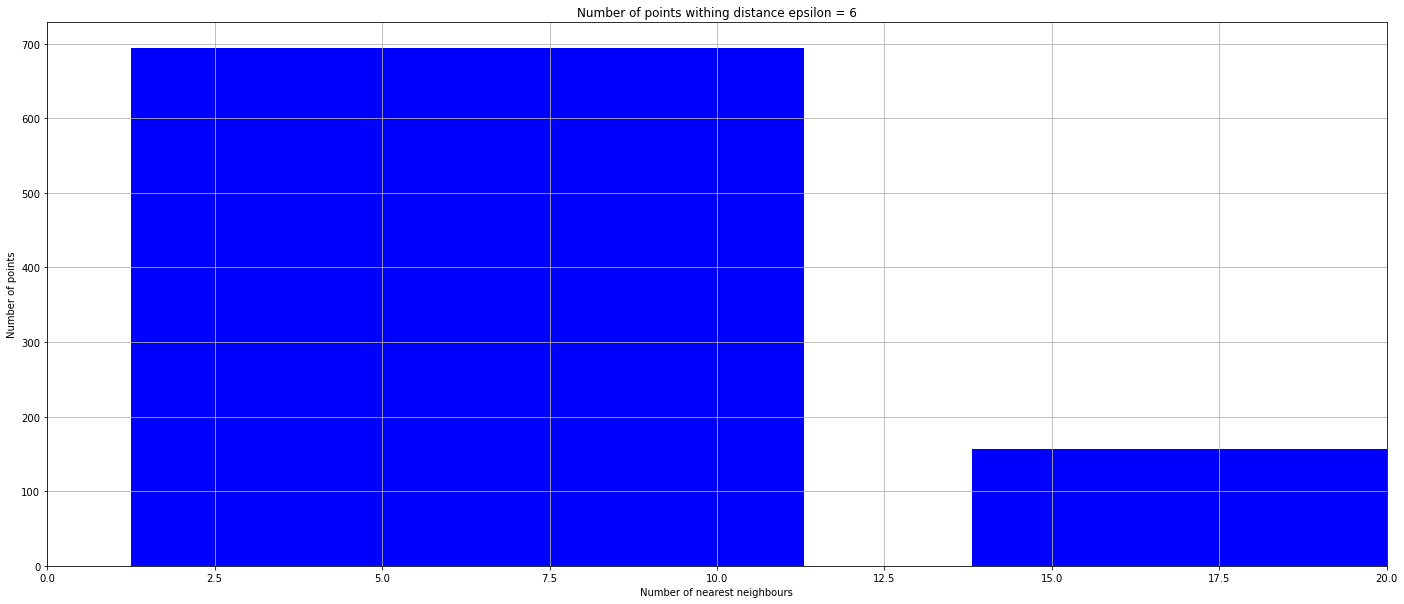

In [39]:
fig, ax = plt.subplots(1, 1,  figsize=(24,10))

ax.hist(nbr_neighb, bins = 1000,color='b',alpha=1, rwidth=0.80)


ax.set_xlim(0,20)
ax.set_xlabel('Number of nearest neighbours')
ax.set_ylabel('Number of points')
ax.set_title('Number of points withing distance epsilon = 6')
ax.grid(True)
plt.show()

In [30]:
#fixer un seuil de voisins, ici 2 voisins

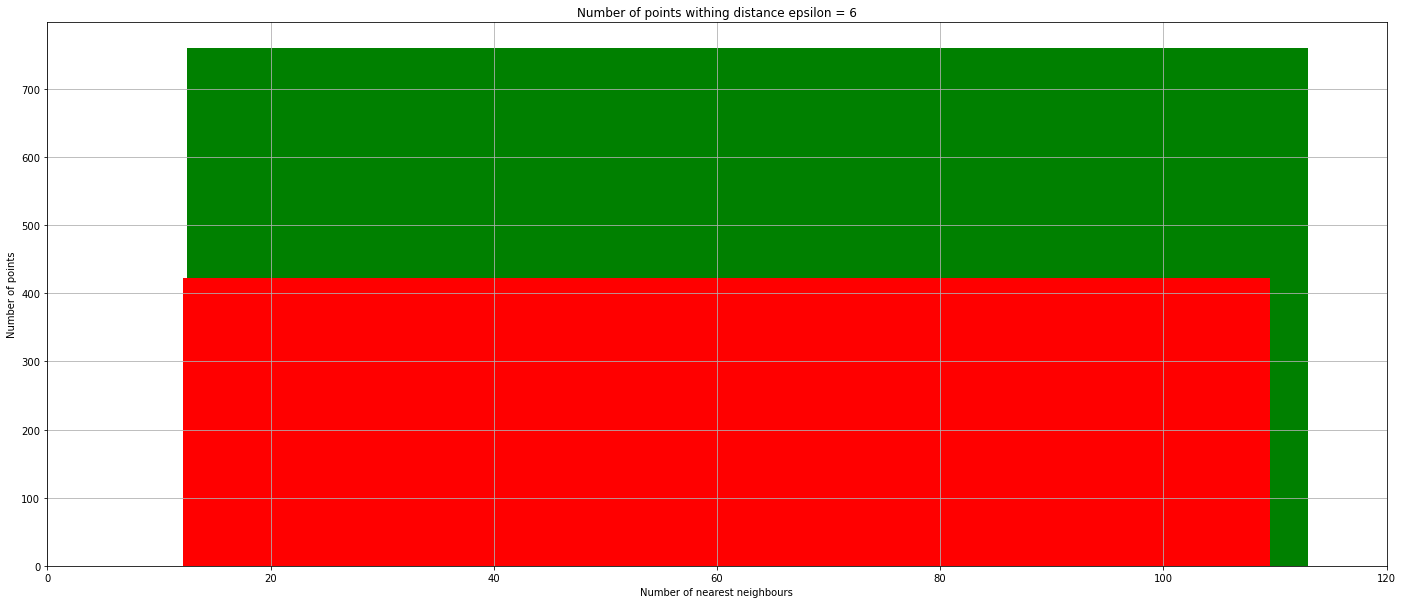

In [40]:
fig, ax = plt.subplots(1, 1,  figsize=(24,10))

ax.hist(nbr_neighb[np.array(Target)==0], bins = 100,color='g',alpha=1, rwidth=0.80)
ax.hist(nbr_neighb[np.array(Target)==1], bins = 100,color='r',alpha=1, rwidth=0.80)


#ax.set_ylim(0,500)
ax.set_xlabel('Number of nearest neighbours')
ax.set_ylabel('Number of points')
ax.set_title('Number of points withing distance epsilon = 6')
ax.grid(True)
ax.set_xlim(0,120)

plt.show()

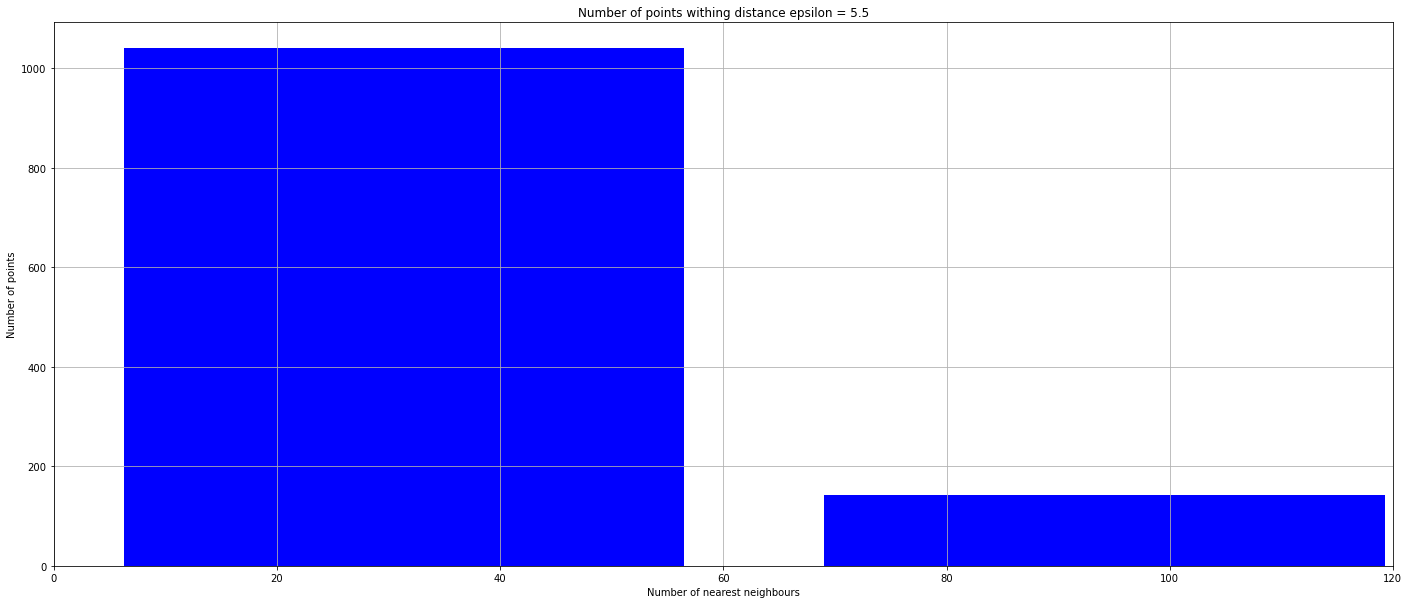

In [41]:
fig, ax = plt.subplots(1, 1,  figsize=(24,10))

ax.hist(nbr_neighb, bins = 200,color='b',alpha=1, rwidth=0.80)


ax.set_xlim(0,120)
ax.set_xlabel('Number of nearest neighbours')
ax.set_ylabel('Number of points')
ax.set_title('Number of points withing distance epsilon = 5.5')
ax.grid(True)
plt.show()

This histogram was obtained on a data set of 5... points, with epsilon = 3. 

It indicates that some points (about 1135, which is 20% of all points) have too few neighbors. Probably they are noise points. A smaller fraction (about 300, which is % of all points) have 60 to 100 neighbors, and starting from 129, the number of neighbors begins to grow.

Based on the histograms above, I would try clustering my data set with the following parameters: epsilon = 6, minPts = 10
.

# Clustering

In [42]:
data_final = data #pd.DataFrame(pd.concat([data_tst,data_tst2])) #data


#data_final.loc[data_final['Class']==1,['Class']]=1
#data_final.loc[data_final['Class']==0,['Class']]=0


def conf_matrix(y_pred, target) :  
    cm = confusion_matrix(target, y_pred)
    #print(cm)
    plt.subplots(figsize=(25, 6))

    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            #print(j)
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    print("Le modèle prédictif a bien identifié", cm[1,1], "fraudeurs, et s'est trompé sur", cm[0,1], "individus non fraudeurs")
    plt.show()
    return cm


def km_reiter(df, n_clusters_max, is_fraud_km, nbiters) : 
    from sklearn import metrics
    from sklearn.cluster import KMeans
    matrix_temp = np.zeros((n_clusters_max*nbiters, len(df)))
    matrix_temp2 = np.zeros((n_clusters_max-2+1, len(df)))
    #matrix_silhouette = np.zeros((2, n_clusters_max-2+1))
    t=0
    j=0
    for n_clusters in range(2,n_clusters_max+1) :
        matrix_temp_n = np.zeros((nbiters, len(df)))
        is_fraud_km1 = np.zeros((len(df)))
        for k in range(0,nbiters) :
            
            km = KMeans(n_clusters)
            temp = km.fit_predict(df)
            
            #if (n_clusters>2) :
            for i in range(0,n_clusters) :
                if len(temp[temp==i]) <= 0.01*len(df) : 
                    temp[temp==i]= 1
                else :
                    temp[temp==i]= 0
            
            matrix_temp_n[k]=temp
            matrix_temp[j]=temp
            j=j+1
        is_fraud_km1 = sum(matrix_temp_n)/(nbiters) 
        
        
        #fig, ax = plt.subplots(1, 1,  figsize=(12,6))

        #ax.hist(is_fraud_km1, bins = 100,color='b',alpha=1, rwidth=0.80)

        #ax.set_ylim(0,500)
        #ax.set_xlabel('Number of nearest neighbours')
        #ax.set_ylabel('Number of points')
        #ax.set_title('Number of points withing distance epsilon = 3.5')
        #ax.grid(True)
        #plt.show()



        #tol1 = input(' La tolérance est fixée à (entre 0 et 1): ')
        #tol1 = float(tol1)
        nbr= np.shape(is_fraud_km1[is_fraud_km1>=0.4])[0]
        print("Le nombre d'individus avec un score supérieur à", 0.4, "est de", nbr)

        is_fraud_km3 = np.zeros(len(df))
        is_fraud_km3[is_fraud_km1>=0.5] = 1
        #matrix_silhouette[0,t] = n_clusters
        #matrix_silhouette[1,t] = metrics.silhouette_score(df, is_fraud_km3)
        t=t+1
        matrix_temp2[n_clusters-2] = is_fraud_km3 
        
    is_fraud_km = sum(matrix_temp)/(n_clusters_max*nbiters)
    return is_fraud_km,matrix_temp2 #matrix_silhouette,




In [43]:
def IF_reiter(df,param_n_estimators, is_fraud_IF, nbiters, contam) : 
    
     #max_features= random.randint(5,df.shape[1]),
    length = nbiters*len(param_n_estimators)
    matrix_temp = np.zeros((length, len(df)))
    array_temp = np.zeros(length)
    print(length)
    i=0
    for n_estims in param_n_estimators :
        for k in range(0,nbiters) :    
            clf=IsolationForest(behaviour='new',  max_samples=random.random(),n_estimators=n_estims, contamination = contam)
            clf.fit(df)
            temp = -clf.decision_function(df)
            threshold = (abs(min(temp))+0.2)*100
            temp = (temp+(abs(min(temp))+0.2))*100
            matrix_temp[i]=temp
            array_temp[i] = threshold
            i=i+1    
    is_fraud_IF = sum(matrix_temp)/length
    threshold = sum(array_temp)/length
        
    return is_fraud_IF, threshold

# 2) Isolation Forest

1
Le modèle prédictif a bien identifié 115 fraudeurs, et s'est trompé sur 39 individus non fraudeurs


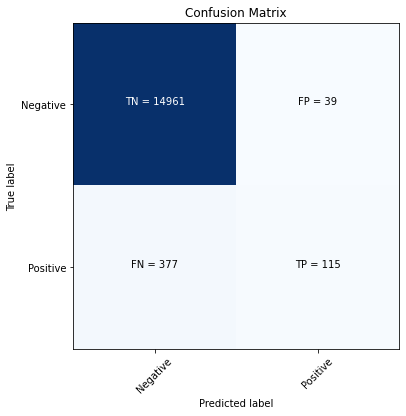

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15000
           1       0.75      0.23      0.36       492

    accuracy                           0.97     15492
   macro avg       0.86      0.62      0.67     15492
weighted avg       0.97      0.97      0.97     15492

PCA took 5.1 s


In [44]:
from sklearn.ensemble import IsolationForest

#del(sum)
t0 = time.time()

contam = 0.01 #expectation/data_std.shape[0] #expectation/data_std.shape[0] #1650/data_std.shape[0] #Supposons l'existence de 1000 fraudeurs au plus
is_fraud_IF = []
is_fraud_IF, threshold =((IF_reiter(data_std,{250}, is_fraud_IF,1,contam)))


data_final["isFraudIF"]=0

data_final.loc[is_fraud_IF>threshold,['isFraudIF']]=1
data_final.loc[is_fraud_IF<=threshold,['isFraudIF']]=0

conf_matrix(data_final["isFraudIF"], Target)
#visualisation_3D(np.array(data_final["isFraudIF"]))

print(classification_report(data_final.Class, data_final["isFraudIF"]))

t1 = time.time()
print("PCA took {:.3} s".format(t1 - t0))

### 3) SVM One Class

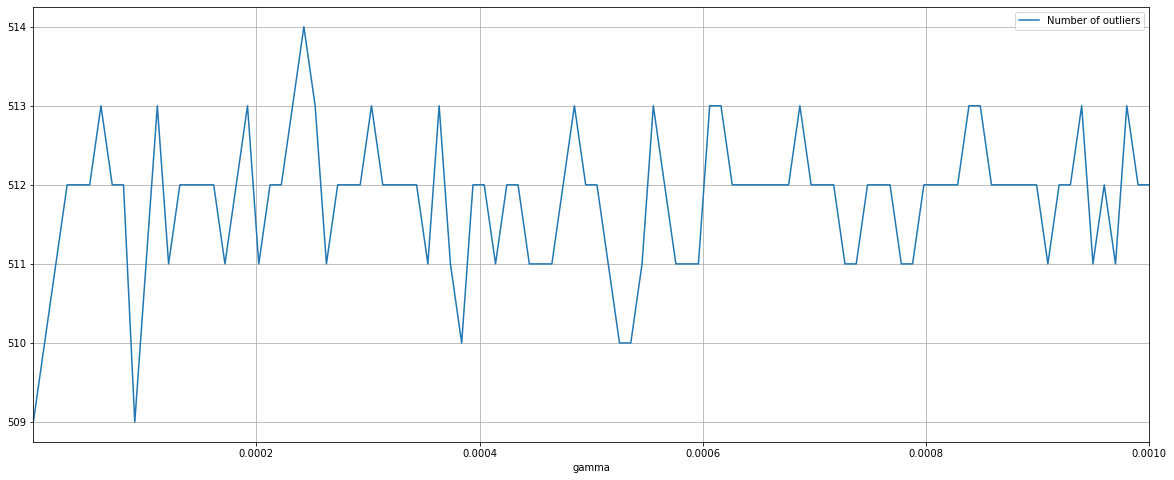

In [45]:
from sklearn import svm

#Choix du param gamma
A = []
B = []

nu = expectation/data_std.shape[0]

for i in np.linspace(0.0000001,0.001,100):
    model = svm.OneClassSVM(nu=nu, shrinking= True, kernel='rbf',  gamma=i)
    model.fit(data_std)
    preds = model.predict(data_std)
    core_samples_mask = np.zeros_like(preds, dtype=bool)
    core_samples_mask[preds==-1] = True
    labels = preds
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    sums = 0
    for t in labels:
        if t == -1: 
            sums = sums + 1
    B.append(sums)
    A.append(i)
    
results = pd.DataFrame([A,B]).T
results.columns = ['gamma','Number of outliers']
results.plot(x='gamma',y='Number of outliers',figsize=(20,8), grid=True, xlim = (0.0000001,0.001))

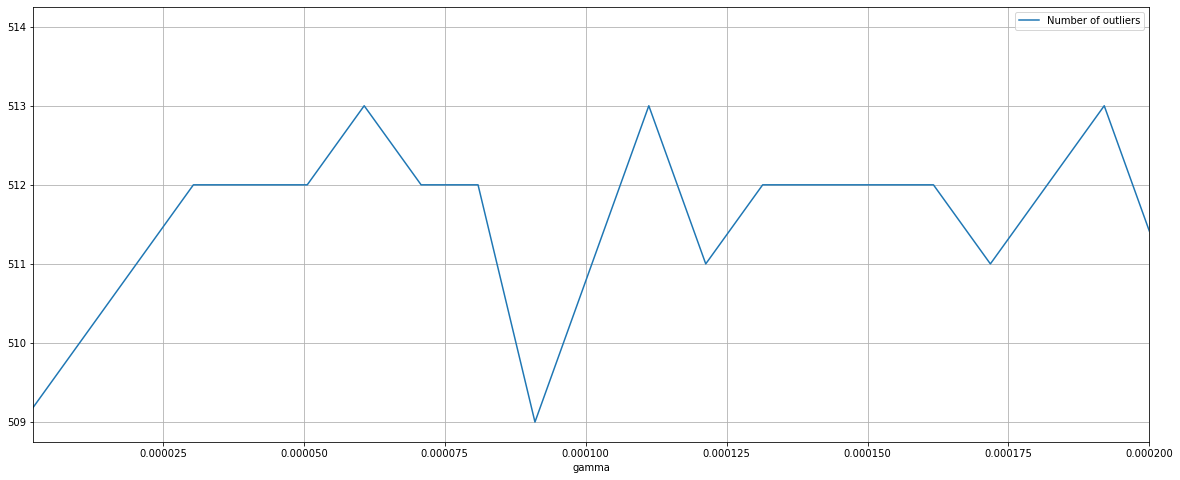

In [46]:
results.plot(x='gamma',y='Number of outliers',figsize=(20,8), grid=True, xlim = (0.000002,0.0002))

nu = 0.01
Le modèle prédictif a bien identifié 73 fraudeurs, et s'est trompé sur 82 individus non fraudeurs


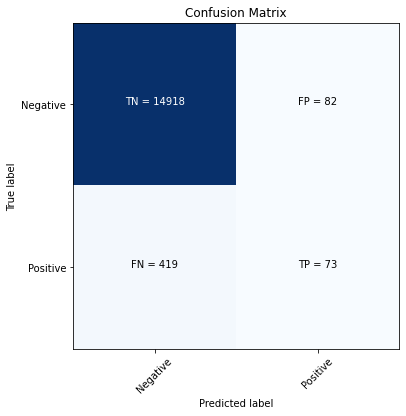

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15000
           1       0.47      0.15      0.23       492

    accuracy                           0.97     15492
   macro avg       0.72      0.57      0.60     15492
weighted avg       0.96      0.97      0.96     15492

PCA took 0.44 s


In [47]:
#https://thisdata.com/blog/unsupervised-machine-learning-with-one-class-support-vector-machines/
from sklearn import svm


# set nu (which should be the proportion of outliers in our dataset)

t0 = time.time()


nu = 0.01#expectation/data_std.shape[0]
print("nu =", nu)

model = svm.OneClassSVM(nu=nu, shrinking= True, kernel='rbf',  gamma=0.000025)  
model.fit(data_std)#data_std_reduced)
preds = model.predict(data_std)#data_std_reduced) 
data_final["isFraudOCSVM"]=0
data_final["isFraudOCSVM"]=abs(((preds+1)/2)-1)

conf_matrix(data_final["isFraudOCSVM"], Target)
#visualisation_2D(np.array(data_final["isFraudIF"]))
#visualisation_3D(np.array(data_final["isFraudOCSVM"]))
print(classification_report(data_final.Class, data_final["isFraudOCSVM"]))

t1 = time.time()
print("PCA took {:.3} s".format(t1 - t0))

In [48]:
for i in range(10,60,5) : 
    print(i)

10
15
20
25
30
35
40
45
50
55


### 3) DBSCAN 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

A = []
B = []
C = []

for i in np.linspace(10,60,40):
    db = DBSCAN(eps=3, min_samples=i).fit(data_std_reduced)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    labels[labels!=0] = 1    
    
    sums = 0
    for t in labels:
        if t == 1: 
            sums = sums + 1
    C.append(sums)
            
    
    
    A.append(i)
    B.append(int(n_clusters_))

In [ ]:
results = pd.DataFrame([A,B,C]).T
results.columns = ['Nbr of samples in a neighborhood to be considered as a core','Number of clusters','Number of outliers']
results.plot(x='Nbr of samples in a neighborhood to be considered as a core',y='Number of clusters',figsize=(10,6))

In [ ]:
results = pd.DataFrame([A,B,C]).T
results.columns = ['Nbr of samples in a neighborhood to be considered as a core','Number of clusters','Number of outliers']
results.plot(x='Nbr of samples in a neighborhood to be considered as a core',y='Number of outliers',figsize=(10,6))

In [ ]:
1

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
t0 = time.time()
db = DBSCAN(eps = 3,  min_samples=10).fit(data_std.values)#.iloc[:10000,:].values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

In [ ]:
import collections

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
print(collections.Counter(labels))

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import collections

t0 = time.time()

labels = np.array([])
for i in range(0, data_std.shape[0], data_std.shape[0]):
    #print(i)
    db = DBSCAN(eps = 6, min_samples=60).fit(data_std.iloc[i:i+data_std.shape[0],:].values)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = np.concatenate((labels,db.labels_))
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print(n_clusters_)
    print(collections.Counter(labels))
#labels[labels!=0] = 1
#collections.Counter(labels)

t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

In [ ]:
from scipy.spatial import distance_matrix
from sklearn.metrics import pairwise_distances


t0 = time.time()


tempClass = np.ones((data_std.shape[0]))
epsilon = 3
minpts = 10

for i in range(0, data_std.shape[0]) :
    temp=pairwise_distances(data_std.iloc[0:i+1,:],data_std.iloc[0:,:])[0]
    temp[i] = np.nan
    
    if len(temp[temp<=3]) >= 10 :
        tempClass[i] = 0
        tempClass[temp<=3] = 0
    
    
t1 = time.time()
print("Compilation took {:.2} s".format(t1 - t0))
    

In [81]:
data_std.shape[0]

204807

In [17]:
a = pairwise_distances(data_std.iloc[0:1,:],data_std.iloc[0:,:])
a[0,0]= np.nan

In [63]:
np.ones((data_std.shape[0]))

array([1., 1., 1., ..., 1., 1., 1.])

In [54]:
c= a[0]
c[c<3].shape

(1667,)

In [69]:
pairwise_distances(data_std.iloc[0:1,:],data_std.iloc[0:,:])

array([[ 0.        ,  4.53164671,  6.08936467, ..., 10.09747047,
        13.37882765,  6.02609453]])

Le modèle prédictif a bien identifié 423 fraudeurs, et s'est trompé sur 1700 individus non fraudeurs


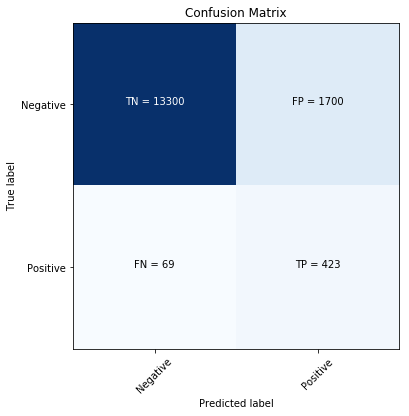

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     15000
           1       0.20      0.86      0.32       492

   micro avg       0.89      0.89      0.89     15492
   macro avg       0.60      0.87      0.63     15492
weighted avg       0.97      0.89      0.92     15492



In [63]:
#import collections

#collections.Counter(labels)
labels[labels !=-1] = 0
labels[labels==-1] = 1
#labels[labels!=-1] = 0

#collections.Counter(labels)

conf_matrix(labels, Target.values)
#visualisation_2D(labels)
#visualisation_3D(labels)
print(classification_report(data_final.Class, labels))
data_final["isFraudDB"] = labels


### K-Means Modif

In [27]:
km = KMeans(2)
temp = km.fit_predict(data_std)

In [29]:
sum(temp)

41861

L'individu le plus récurrent est apparu 0 fois sur 2
Le vecteur des score se répartit de la sorte : [0. 0. 0. 0. 0.]


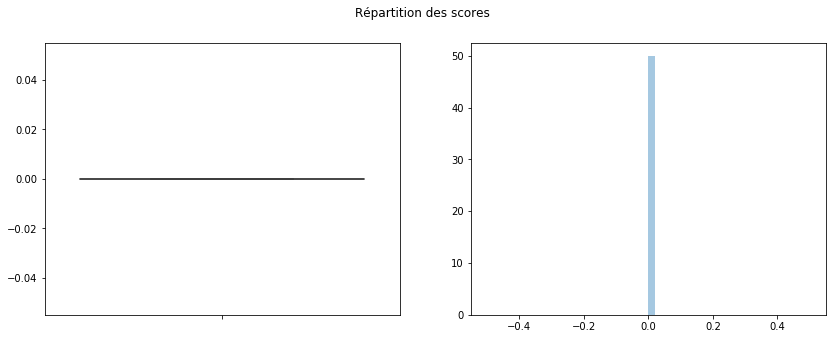

 La tolérance est fixée à (entre 0 et 1):  0


Le nombre d'individus avec un score supérieur à 0.0 est de 284807


284807

In [20]:
print("L'individu le plus récurrent est apparu", int(is_fraud_km.max()*nbiters*(n_clusters_max-2+1))  ,'fois sur', nbiters*(n_clusters_max-2+1))
print("Le vecteur des score se répartit de la sorte :", np.percentile(np.array(is_fraud_km), [25, 50, 75, 90, 95]))

f, (ax1,ax2) = plt.subplots(1,2,figsize=(14, 5))
f.suptitle('Répartition des scores')
sns.boxplot(y=is_fraud_km, ax= ax1)
sns.distplot(is_fraud_km, ax= ax2)
plt.show()


tol1 = input(' La tolérance est fixée à (entre 0 et 1): ')
tol1 = float(tol1)
nbr= np.shape(is_fraud_km[is_fraud_km>=tol1])[0]
print("Le nombre d'individus avec un score supérieur à", tol1, "est de", nbr)

is_fraud_km2 = np.zeros(len(data_std))
is_fraud_km2[is_fraud_km>=tol1] = 1
len(is_fraud_km2)
#cm_som = conf_matrix(is_fraud_km2)
#visualisation_3D(is_fraud_km2)
#print(classification_report(data_final.Class, is_fraud_km2))

## Deep Learning

## Restricted Boltzmann machines

In [9]:
# Importing the libraries
import numpy as np
import pandas as pd
import torch
import torch.nn.parallel
import torch.utils.data
from torch.distributions.normal import Normal
from torch.distributions import MultivariateNormal, StudentT
from sklearn.model_selection import train_test_split


# Creating the architecture of the Neural Network
class RBM():
    
    def __init__(self, nv, nh, alpha =0.001, momentum = 0.9, l2=0.01, scale = 'normalize', type_units = 'Gaussian-Binary'):
        """
        scale : 'standardize' or 'normalize'
        type_units : 'Gaussian-Binary' or 'Gaussian-Gaussian'
        """
        self.nh = nh
        self.nv = nv
        self.W = torch.randn(self.nh, self.nv)/10 #Normal(torch.tensor([0.0]), torch.tensor([0.01])).sample() #torch.randn(nh, nv)
        self.a = torch.randn(1, self.nh)*0 #torch.randn(1, nh)/5
        self.b = torch.randn(1, self.nv)*0 #torch.randn(1, nv)/5
        self.momentum = momentum
        self.alpha = alpha
        self.scale = scale
        self.type_units = type_units
        self.dw = torch.randn(self.nh, self.nv)*0
        self.l2 = l2
    
    #def train_test_split_RBM(self, X_train, y, size) :
        
        '''  
        test_size : float between 0 and 1
        ''' 
        
        #X_train, X_test, y_train, y_test = train_test_split(X[y == 0], y[y == 0], test_size = size)
        #X_test = X_test.append( X[y == 1])
        #y_test = y_test.append( y[y == 1])

        # Converting the data into Torch tensors
        #training_set_RBM = torch.FloatTensor(X_train.values)
        #test_set_RBM = torch.FloatTensor(X_test.values)
        
        #return X_train, X_test, y_train, y_test, training_set_RBM, test_set_RBM
    
    def preprocess(self, df) :
        """
        scale : 'standardize' or 'normalize'
        """
        
        scale = self.scale 
        
        if scale == 'standardize' :
            scaler = StandardScaler()

        if scale == 'normalize' :
            scaler = MinMaxScaler(feature_range=(0.05,0.95))

        df_scaled = pd.DataFrame(scaler.fit_transform(df))
        
        #scaler2 = MinMaxScaler()
        #df_scaled = pd.DataFrame(scaler2.fit_transform(df_scaled))
        #df_scaled.columns = df.columns  


        return df_scaled
    
    def sample_h(self, x):
        wx = torch.mm(x, self.W.t())
        activation = wx + self.a.expand_as(wx)
        p_h_given_v = torch.sigmoid(activation)
        #print(activation)
        #print(p_h_given_v)
        #print(nh)
        
        type_units = self.type_units
        
        if type_units == 'Gaussian-Binary' :
            return p_h_given_v, torch.bernoulli(p_h_given_v)#MultivariateNormal(activation, torch.eye(self.nh,self.nh)).sample()#torch.bernoulli(p_h_given_v) #MultivariateNormal(activation, torch.eye(nh,nh)).sample() #torch.bernoulli(p_h_given_v)
    
        if type_units == 'Gaussian-Gaussian' :
            return p_h_given_v, MultivariateNormal(activation, torch.eye(self.nh,self.nh)).sample()
        
    def sample_v(self, y):
        wy = torch.mm(y, self.W)
        activation = wy + self.b.expand_as(wy)
        #print(activation)
        p_v_given_h = torch.sigmoid(activation)
        #mean = activation 
        #std = torch.FloatTensor(np.identity(mean.shape[0]))
        #print(nh)
        
        
        return p_v_given_h, MultivariateNormal(activation, torch.eye(self.nv,self.nv)).sample()#torch.normal(activation , 1.0)#torch.bernoulli(p_v_given_h) #torch.normal(activation , 1) #p_v_given_h)
    
    def train(self, v0, vk, ph0, phk):
        #self.W += self.alpha*(torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
        
        #dw = positive - negative
        #self.dw = self.momentum*self.dw + (1-self.momentum)*dw
        #self.w_upd8 = self.W.assign_add(self.learning_rate*self.dw - self.learning_rate*self.l2*self.W)
        
        dw = (torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
        self.dw = self.momentum*self.dw + (1-self.momentum)*dw
        self.W = self.alpha*self.dw - self.alpha*self.l2*self.W
        
        #self.W = self.momentum*self.W + self.alpha*(torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
        
        #self.W = self.momentum*self.W + (1-self.momentum)*(torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
        
        #self.W += torch.mm(ph0, v0) - torch.mm(phk, vk)
        self.b = self.momentum*self.b + self.alpha*torch.sum((v0 - vk), 0)
        self.a = self.momentum*self.a + self.alpha*torch.sum((ph0 - phk), 0)


    def train_RBM(self, training_set, batch_size, nbr_epochs) :
        
        #nh = self.nh
        
        training_set = self.preprocess(np.array(training_set))
        training_set_scaled = torch.FloatTensor(training_set.values)
        
        print('Processing Training...')
        nb_transacs = (training_set.shape[0])

        # Training the RBM

        train_target = np.zeros(nb_transacs)

        for epoch in range(1, nbr_epochs + 1):
            print('Epoch ' + str(epoch) + '...')


            train_loss = 0
            s = 0.
            for id_transac in range(0, nb_transacs - batch_size, batch_size):
                vk = training_set_scaled[id_transac:id_transac+batch_size]
                #print(vk)
                v0 = training_set_scaled[id_transac:id_transac+batch_size]
                #print(v0)   
                ph0,_ = self.sample_h(v0)
                for k in range(5):
                    #print(k)
                    _, hk = self.sample_h(vk)
                    _, vk = self.sample_v(hk)
                    #print(hk)
                phk,_ = self.sample_h(vk)
                self.train(v0, vk, ph0, phk)
                #print(+2)
                train_loss += np.sqrt(torch.mean(v0 - vk)**2)
                train_target[id_transac] = (np.sqrt(torch.mean(v0 - vk)**2))

                s += 1.

            print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

        return training_set_scaled
        
    def test_RBM(self, test_set) :
        
        test_set = self.preprocess(np.array(test_set))
        test_set_scaled = torch.FloatTensor(test_set.values)
        
        print('Processing Testing...')
        # Testing the RBM
        nb_transacs_test = test_set_scaled.shape[0]
        test_loss = 0
        s = 0.
        test_target = np.zeros(nb_transacs_test)
        for id_transac in range(nb_transacs_test-1):
            vt = test_set_scaled[id_transac:id_transac+1]
            _, h = self.sample_h(vt)
            _,vtk = self.sample_v(h)
            test_loss += np.sqrt(torch.mean(vt - vtk)**2)
            test_target[id_transac] = (np.sqrt(torch.mean(vt - vtk)**2))
            s += 1.
        print('test loss: '+str(test_loss/s))
        
        return test_target, test_set_scaled
    
    def free_energy_calc(self, df) :
        # Free energy 
        free_energy = np.zeros(len(df))
        x = self.a+ torch.mm(self.W, df.t()).t()
        
        type_units = self.type_units
        
        if type_units== 'Gaussian-Binary' :
            
            for i in range(0,len(df)) :
                free_energy[i] = 0.5*(torch.dist(self.b, df[i])**2) - sum(np.log(np.exp(x[i])+1))
        
        if type_units== 'Gaussian-Gaussian' :
            
            for i in range(0,len(df)) :
                z = torch.norm(torch.mm(self.W, df[1].reshape(-1,1)))**2
                m3m = torch.mm(self.a , torch.mm(self.W, df[1].reshape(-1,1)))
                free_energy[i] = 0.5*(torch.dist(self.b, df[i])**2) - (self.nh*np.log(2*np.pi)/2) - z/2 - m3m
        
        return free_energy

In [40]:
#Multivariate data frame

lng = 100

data_tst = np.random.multivariate_normal(np.zeros(lng), np.eye(lng), 30).T

for i in range(0,200) : 
    data_tst = np.append(data_tst,(np.random.multivariate_normal(np.zeros(lng), np.eye(lng), 30).T), axis=0)
    
data_tst = pd.DataFrame(data_tst)
data_tst['Class'] = 0
data_tst.columns = data.iloc[:,0:31].columns

Target_tst = data_tst.Class
#data_tst = data_tst.drop([data_tst.columns[-1]], axis=1)

X_train = data_tst.drop([data_tst.columns[-1]], axis=1)
y_train = Target_tst

dd = pd.DataFrame(np.exp(np.random.rand(500,30))+2)
dd = np.append(dd,(np.random.multivariate_normal(np.zeros(2500), np.eye(2500), 30).T), axis=0)

data_tst2 = pd.DataFrame(dd)
data_tst2['Class'] = 0
data_tst2.loc[0:500,'Class'] = 1
data_tst2.columns = data.iloc[:,0:31].columns
y_test = data_tst2.Class
X_test = data_tst2.drop([data_tst2.columns[-1]], axis=1)

In [1]:
# Converting the data into Torch tensors
training_set_RBM = torch.FloatTensor(X_train.values)
test_set_RBM = torch.FloatTensor(X_test.values)


nbr_visible = len(training_set_RBM[0])
nbr_hidden = 20

#alpha = 0.001 #learning rate
#momentum = 0
#rbm = RBM(nv, nh)
#mod = rbm.train_RBM(training_set, nh, 100, nbr_epochs = 4)
#test_target = rbm.test_RBM(test_set)

rbm = RBM(nbr_visible, nbr_hidden, momentum = 0.9, alpha = 0.001, type_units='Gaussian-Gaussian')

#X_train, X_test, y_train, y_test, training_set_RBM, test_set_RBM = rbm.train_test_split_RBM(X, y, size = 0.2)

train_set_scaled = rbm.train_RBM(training_set_RBM, batch_size = 64, nbr_epochs = 5)
test_target, test_set_scaled = rbm.test_RBM(test_set_RBM)
free_energy = rbm.free_energy_calc(test_set_scaled)


In [22]:
a = np.array([2,1,20,5989,42309,43,32])
(a+np.mean(a))/(max(a)-np.mean(a))

array([0.19538518, 0.19535693, 0.19589372, 0.364532  , 1.39065735,
       0.19654353, 0.19623275])

In [105]:
from sklearn.cluster import KMeans
km = KMeans(2)
km.fit_predict(free_energy.reshape(-1,1))


array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

Le modèle prédictif a bien identifié 370 fraudeurs, et s'est trompé sur 130 individus non fraudeurs


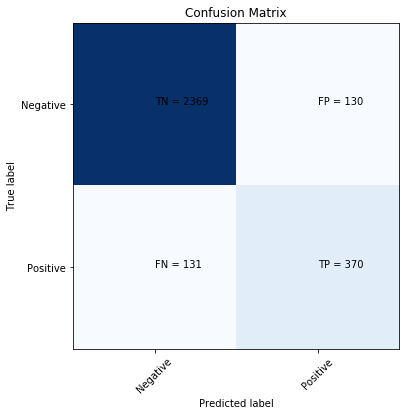

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2499
           1       0.74      0.74      0.74       501

   micro avg       0.91      0.91      0.91      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.91      0.91      0.91      3000



In [42]:
#MSE
#km = KMeans(2)
#data_final['free_energy'] = np.array(free_energy.reshape(-1,1))
data_final2 = data_tst2
tmp = pd.DataFrame(columns = ['score', 'ind'])

tmp['score'] = (test_target)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#pd.DataFrame(test_target)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#
tmp['ind'] = X_test.index

data_final2['isFraudRBM_Multiv'] = 0#km.fit_predict(test_target.reshape(-1,1))
data_final2['isFraudRBM_Multiv'][tmp.sort_values('score', ascending=False).head(500).ind.values] = 1
conf_matrix(data_final2['isFraudRBM_Multiv'], data_final2.Class)
#visualisation_2D(data_final['isFraudNN'])
print(classification_report(data_final2.Class, data_final2['isFraudRBM_Multiv']))

Le modèle prédictif a bien identifié 500 fraudeurs, et s'est trompé sur 0 individus non fraudeurs


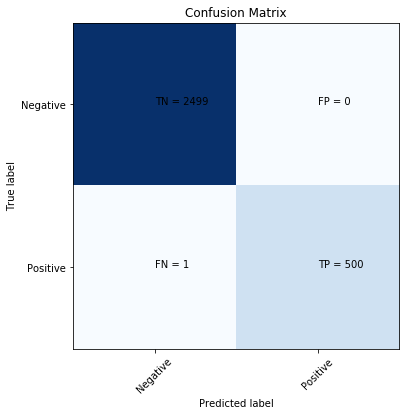

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2499
           1       1.00      1.00      1.00       501

   micro avg       1.00      1.00      1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [43]:
#free energy

#data_final['free_energy'] = np.array(free_energy.reshape(-1,1))

data_final2 = data_tst2
tmp = pd.DataFrame(columns = ['score', 'ind'])
tmp['score'] = np.array(free_energy)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#pd.DataFrame(test_target)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#
tmp['ind'] = X_test.index

data_final2['isFraudRBM'] = 0#km.fit_predict(free_energy.reshape(-1,1))
data_final2['isFraudRBM'][tmp.sort_values('score', ascending=False).head(500).ind.values] = 1
conf_matrix(data_final2['isFraudRBM'], y_test)
#visualisation_2D(data_final['isFraudNN'])
print(classification_report(y_test, data_final2['isFraudRBM']))


In [107]:
data = pd.read_csv("/Users/akrim/Downloads/creditcard 2.csv")


In [104]:
data4.iloc[:,1:-1].shape

(269315, 29)

In [27]:
data5 = data4.sample(n=30000)
X_train = data5.iloc[:,1:-1] #data_train.iloc[:,1:-1]
y_train = data5.iloc[:,-1]
nbr_visible = data5.iloc[:,1:-1].shape[1]

In [28]:
#data = pd.read_csv("/Users/akrim/Downloads/creditcard 2.csv")


#X_train = data_train.iloc[:,1:-1]#data_train.iloc[:,1:-1]
#y_train = data_train.iloc[:,-1]

X_test = data.iloc[:,1:-1]
y_test = data.iloc[:,-1]

#nbr_visible = data_train.iloc[:,1:-1].shape[1]
nbr_hidden = 15

rbm = RBM(nbr_visible, nbr_hidden, momentum = 0.95, scale = 'standardize', alpha = 0.0001, type_units='Gaussian-Binary')



training_set_RBM = torch.FloatTensor(X_train.values)
test_set_RBM = torch.FloatTensor(X_test.values)

train_set_scaled = rbm.train_RBM(training_set_RBM, batch_size = 100, nbr_epochs = 10)
test_target, test_set_scaled = rbm.test_RBM(test_set_RBM)
#free_energy_train = rbm.free_energy_calc(train_set_scaled)
free_energy_test = rbm.free_energy_calc(test_set_scaled)

Processing Training...
Epoch 1...
epoch: 1 loss: tensor(0.0215)
Epoch 2...
epoch: 2 loss: tensor(0.0211)
Epoch 3...
epoch: 3 loss: tensor(0.0192)
Epoch 4...
epoch: 4 loss: tensor(0.0191)
Epoch 5...
epoch: 5 loss: tensor(0.0203)
Epoch 6...
epoch: 6 loss: tensor(0.0195)
Epoch 7...
epoch: 7 loss: tensor(0.0208)
Epoch 8...
epoch: 8 loss: tensor(0.0193)
Epoch 9...
epoch: 9 loss: tensor(0.0195)
Epoch 10...
epoch: 10 loss: tensor(0.0199)
Processing Testing...
test loss: tensor(0.1950)


In [74]:
#data = pd.read_csv("/Users/akrim/Downloads/creditcard 2.csv")
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

nbr_visible = data.iloc[:,1:-1].shape[1]
nbr_hidden = 15

rbm = RBM(nbr_visible, nbr_hidden, momentum = 0.95, scale = 'standardize', alpha = 0.0001, type_units='Gaussian-Gaussian')

#X_train, X_test, y_train, y_test, training_set_RBM, test_set_RBM = rbm.train_test_split_RBM(X, y, size = 1-80000/data.shape[0])#0.2)

X_train, X_test, y_train, y_test = train_test_split(X[y == 0], y[y == 0], test_size = 0.2)
X_test = X_test.append( X[y == 1])
y_test = y_test.append( y[y == 1])

#training_set_RBM = torch.FloatTensor(X_train.values)
#test_set_RBM = torch.FloatTensor(X_test.values)

#train_set_scaled = rbm.train_RBM(training_set_RBM, batch_size = 1, nbr_epochs = 10)
#test_target, test_set_scaled = rbm.test_RBM(test_set_RBM)
#free_energy_train = rbm.free_energy_calc(train_set_scaled)
#free_energy_test = rbm.free_energy_calc(test_set_scaled)


In [ ]:
# learning rate graph : weights !
# hidden ?

In [59]:
data2 = data.iloc[:,1:]

Le modèle prédictif a bien identifié 37 fraudeurs, et s'est trompé sur 2963 individus non fraudeurs


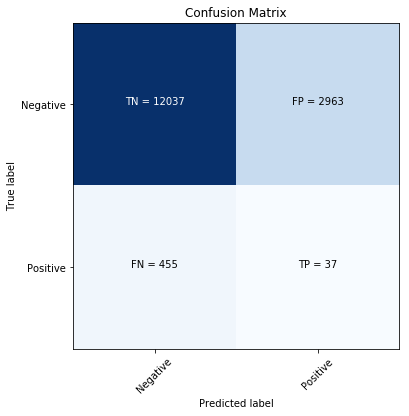

              precision    recall  f1-score   support

           0       0.96      0.80      0.88     15000
           1       0.01      0.08      0.02       492

   micro avg       0.78      0.78      0.78     15492
   macro avg       0.49      0.44      0.45     15492
weighted avg       0.93      0.78      0.85     15492



In [108]:
#MSE

#data_final['free_energy'] = np.array(free_energy.reshape(-1,1))
#preds = model.fit_predict(test_target.reshape(-1,1))#data_std_reduced)

data_final2 = X_test#X_test
tmp = pd.DataFrame(columns = ['score', 'ind'])
tmp['score'] = (test_target)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#pd.DataFrame(test_target)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#
tmp['ind'] = X_test.index#X_test.index

data_final2['isFraudRBM'] = 0#abs(((preds+1)/2)-1)#km.fit_predict(test_target.reshape(-1,1))
data_final2['isFraudRBM'][tmp.sort_values('score', ascending=True).head(3000).ind.values] = 1
conf_matrix(data_final2['isFraudRBM'], y_test)#y_test)
#visualisation_2D(data_final['isFraudNN'])
print(classification_report(y_test, data_final2['isFraudRBM']))


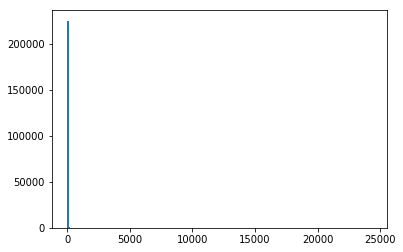

In [99]:
plt.hist(free_energy_test, bins=200)
plt.show()

In [34]:
free_energy_test

array([13.29102135, -2.98998642, -1.27346325, ..., 20.66119003,
       52.68045044, -3.51208639])

# 80000 train

nu = 0.01
Le modèle prédictif a bien identifié 279 fraudeurs, et s'est trompé sur 1769 individus non fraudeurs


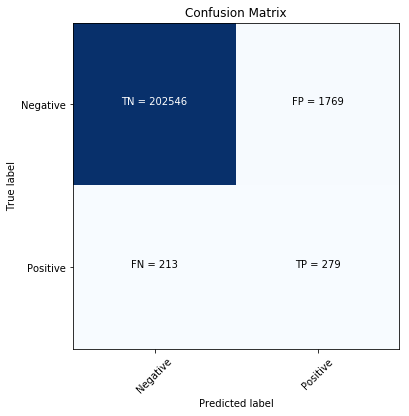

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    204315
           1       0.14      0.57      0.22       492

   micro avg       0.99      0.99      0.99    204807
   macro avg       0.57      0.78      0.61    204807
weighted avg       1.00      0.99      0.99    204807



In [22]:
## Gaussian-Gaussian


#free energy
from sklearn.cluster import KMeans
km = KMeans(2)

nu = 0.01
print("nu =", nu)

#model = svm.OneClassSVM(shrinking= True, kernel='rbf')  


data_final2 = X_test#X_test


#contam = 3000/len(free_energy_test) #2000/data_std.shape[0] #expectation/data_std.shape[0] #1650/data_std.shape[0] #Supposons l'existence de 1000 fraudeurs au plus
#is_fraud_IF = []
#is_fraud_IF, threshold =IF_reiter(free_energy_test.reshape(-1,1),{100, 150, 200, 250, 300}, is_fraud_IF,5,contam)


#data_final2["isFraudRBM"]=0

#data_final2.loc[is_fraud_IF>threshold,['isFraudRBM']]=1
#data_final2.loc[is_fraud_IF<=threshold,['isFraudRBM']]=0



#data_final['free_energy'] = np.array(free_energy.reshape(-1,1))
#preds = model.fit_predict(free_energy2.reshape(-1,1))#data_std_reduced)
#preds = clf.predict(free_energy_test.reshape(-1,1))


data_final2 = X_test#X_test
tmp = pd.DataFrame(columns = ['score', 'ind'])
tmp['score'] = np.array(free_energy_test)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#pd.DataFrame(test_target)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#
tmp['ind'] = X_test.index#X_test.index

data_final2['isFraudRBM'] = 0#abs(((preds+1)/2)-1)#0#abs(((preds+1)/2)-1)#km.fit_predict(free_energy2.reshape(-1,1))#abs(((preds+1)/2)-1)#

data_final2['isFraudRBM'][tmp.sort_values('score', ascending=False).head(int(0.01*data.shape[0])).ind.values] = 1  #int(0.01*data.shape[0])
conf_matrix(data_final2['isFraudRBM'], y_test)#y_test)
#visualisation_2D(data_final['isFraudNN'])
print(classification_report(y_test, data_final2['isFraudRBM']))

free_energy80k = free_energy_test

# 5000 train

nu = 0.01
Le modèle prédictif a bien identifié 280 fraudeurs, et s'est trompé sur 1768 individus non fraudeurs


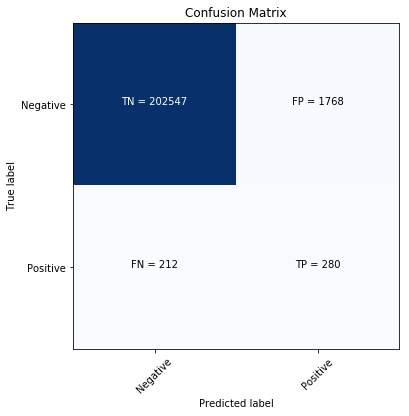

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    204315
           1       0.14      0.57      0.22       492

   micro avg       0.99      0.99      0.99    204807
   macro avg       0.57      0.78      0.61    204807
weighted avg       1.00      0.99      0.99    204807



In [26]:
## Gaussian-Gaussian


#free energy
from sklearn.cluster import KMeans
km = KMeans(2)

nu = 0.01
print("nu =", nu)

#model = svm.OneClassSVM(shrinking= True, kernel='rbf')  


data_final2 = X_test#X_test


#contam = 3000/len(free_energy_test) #2000/data_std.shape[0] #expectation/data_std.shape[0] #1650/data_std.shape[0] #Supposons l'existence de 1000 fraudeurs au plus
#is_fraud_IF = []
#is_fraud_IF, threshold =IF_reiter(free_energy_test.reshape(-1,1),{100, 150, 200, 250, 300}, is_fraud_IF,5,contam)


#data_final2["isFraudRBM"]=0

#data_final2.loc[is_fraud_IF>threshold,['isFraudRBM']]=1
#data_final2.loc[is_fraud_IF<=threshold,['isFraudRBM']]=0



#data_final['free_energy'] = np.array(free_energy.reshape(-1,1))
#preds = model.fit_predict(free_energy2.reshape(-1,1))#data_std_reduced)
#preds = clf.predict(free_energy_test.reshape(-1,1))


data_final2 = X_test#X_test
tmp = pd.DataFrame(columns = ['score', 'ind'])
tmp['score'] = np.array(free_energy_test)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#pd.DataFrame(test_target)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#
tmp['ind'] = X_test.index#X_test.index

data_final2['isFraudRBM'] = 0#abs(((preds+1)/2)-1)#0#abs(((preds+1)/2)-1)#km.fit_predict(free_energy2.reshape(-1,1))#abs(((preds+1)/2)-1)#

data_final2['isFraudRBM'][tmp.sort_values('score', ascending=False).head(int(0.01*data.shape[0])).ind.values] = 1  #int(0.01*data.shape[0])
conf_matrix(data_final2['isFraudRBM'], y_test)#y_test)
#visualisation_2D(data_final['isFraudNN'])
print(classification_report(y_test, data_final2['isFraudRBM']))

free_energy5k = free_energy_test

# 30 000 train

nu = 0.01
Le modèle prédictif a bien identifié 279 fraudeurs, et s'est trompé sur 1769 individus non fraudeurs


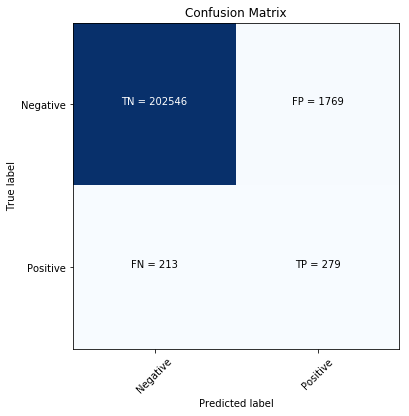

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    204315
           1       0.14      0.57      0.22       492

   micro avg       0.99      0.99      0.99    204807
   macro avg       0.57      0.78      0.61    204807
weighted avg       1.00      0.99      0.99    204807



In [30]:
## Gaussian-Gaussian


#free energy
from sklearn.cluster import KMeans
km = KMeans(2)

nu = 0.01
print("nu =", nu)

#model = svm.OneClassSVM(shrinking= True, kernel='rbf')  


data_final2 = X_test#X_test


#contam = 3000/len(free_energy_test) #2000/data_std.shape[0] #expectation/data_std.shape[0] #1650/data_std.shape[0] #Supposons l'existence de 1000 fraudeurs au plus
#is_fraud_IF = []
#is_fraud_IF, threshold =IF_reiter(free_energy_test.reshape(-1,1),{100, 150, 200, 250, 300}, is_fraud_IF,5,contam)


#data_final2["isFraudRBM"]=0

#data_final2.loc[is_fraud_IF>threshold,['isFraudRBM']]=1
#data_final2.loc[is_fraud_IF<=threshold,['isFraudRBM']]=0



#data_final['free_energy'] = np.array(free_energy.reshape(-1,1))
#preds = model.fit_predict(free_energy2.reshape(-1,1))#data_std_reduced)
#preds = clf.predict(free_energy_test.reshape(-1,1))


data_final2 = X_test#X_test
tmp = pd.DataFrame(columns = ['score', 'ind'])
tmp['score'] = np.array(free_energy_test)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#pd.DataFrame(test_target)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#
tmp['ind'] = X_test.index#X_test.index

data_final2['isFraudRBM'] = 0#abs(((preds+1)/2)-1)#0#abs(((preds+1)/2)-1)#km.fit_predict(free_energy2.reshape(-1,1))#abs(((preds+1)/2)-1)#

data_final2['isFraudRBM'][tmp.sort_values('score', ascending=False).head(int(0.01*data.shape[0])).ind.values] = 1  #int(0.01*data.shape[0])
conf_matrix(data_final2['isFraudRBM'], y_test)#y_test)
#visualisation_2D(data_final['isFraudNN'])
print(classification_report(y_test, data_final2['isFraudRBM']))


free_energy30k = free_energy_test

# 150 000 train

nu = 0.01
Le modèle prédictif a bien identifié 406 fraudeurs, et s'est trompé sur 729 individus non fraudeurs


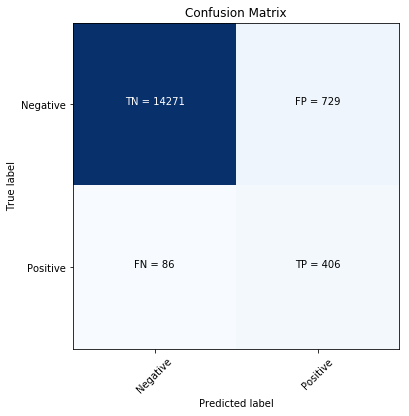

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     15000
           1       0.36      0.83      0.50       492

   micro avg       0.95      0.95      0.95     15492
   macro avg       0.68      0.89      0.74     15492
weighted avg       0.97      0.95      0.96     15492



In [129]:
## Gaussian-Gaussian


#free energy
from sklearn.cluster import KMeans
km = KMeans(2)

nu = 0.01
print("nu =", nu)

#model = svm.OneClassSVM(shrinking= True, kernel='rbf')  


data_final2 = X_test#X_test


#contam = 3000/len(free_energy_test) #2000/data_std.shape[0] #expectation/data_std.shape[0] #1650/data_std.shape[0] #Supposons l'existence de 1000 fraudeurs au plus
#is_fraud_IF = []
#is_fraud_IF, threshold =IF_reiter(free_energy_test.reshape(-1,1),{100, 150, 200, 250, 300}, is_fraud_IF,5,contam)


#data_final2["isFraudRBM"]=0

#data_final2.loc[is_fraud_IF>threshold,['isFraudRBM']]=1
#data_final2.loc[is_fraud_IF<=threshold,['isFraudRBM']]=0



#data_final['free_energy'] = np.array(free_energy.reshape(-1,1))
#preds = model.fit_predict(free_energy2.reshape(-1,1))#data_std_reduced)
#preds = clf.predict(free_energy_test.reshape(-1,1))


data_final2 = X_test#X_test
tmp = pd.DataFrame(columns = ['score', 'ind'])
tmp['score'] = np.array(free_energy_test)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#pd.DataFrame(test_target)#pd.DataFrame(np.array(free_energy.reshape(-1,1)))#
tmp['ind'] = X_test.index#X_test.index

data_final2['isFraudRBM'] = 0#abs(((preds+1)/2)-1)#0#abs(((preds+1)/2)-1)#km.fit_predict(free_energy2.reshape(-1,1))#abs(((preds+1)/2)-1)#

data_final2['isFraudRBM'][tmp.sort_values('score', ascending=False).head(expectation).ind.values] = 1  #int(0.01*data.shape[0])
conf_matrix(data_final2['isFraudRBM'], y_test)#y_test)
#visualisation_2D(data_final['isFraudNN'])
print(classification_report(y_test, data_final2['isFraudRBM']))

free_energy150k = free_energy_test

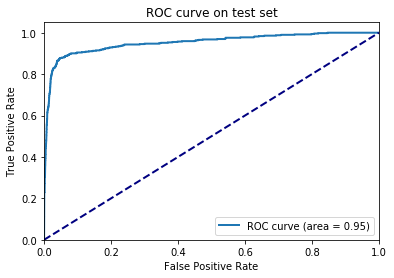

In [42]:
from sklearn.metrics import roc_curve, auc
#fpr, tpr, _ = roc_curve(y_test, free_energy_test)
fpr1, tpr1, _ = roc_curve(y_test, free_energy5k)
fpr2, tpr2, _ = roc_curve(y_test, free_energy30k)
fpr3, tpr3, _ = roc_curve(y_test, free_energy80k)


#fpr_micro, tpr_micro, _ = roc_curve(y_test, free_energy_test)
#roc_auc = auc(fpr_micro, tpr_micro)

fpr_micro1, tpr_micro1, _ = roc_curve(y_test, free_energy80k)
roc_auc1 = auc(fpr_micro1, tpr_micro1)

#fpr_micro2, tpr_micro2, _ = roc_curve(y_test, free_energy30k)
#roc_auc2 = auc(fpr_micro2, tpr_micro2)

#fpr_micro3, tpr_micro3, _ = roc_curve(y_test, free_energy80k)
#roc_auc3 = auc(fpr_micro3, tpr_micro3)


plt.plot(fpr1, tpr1, 
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc1)
#plt.plot(fpr2, tpr2, 
#         lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
#plt.plot(fpr3, tpr3, 
#         lw=2, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve on test set')
plt.legend(loc="lower right")
plt.show()

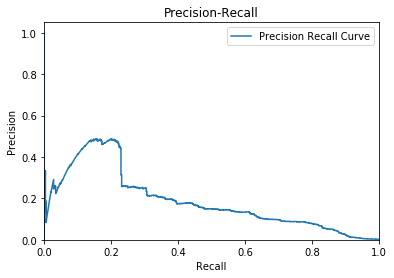

In [41]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall(lines):
    

    for precision, recall, label in lines:
        plt.plot(recall, precision, label=label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall')
    plt.legend(loc="upper right")
    plt.show()
    
lines = []
precision, recall, threshold = precision_recall_curve(y_test, free_energy5k)
#precision1, recall1, threshold1 = precision_recall_curve(y_test, free_energy30k)
#precision2, recall2, threshold2 = precision_recall_curve(y_test, free_energy80k)

lines.append( (precision, recall, 'Precision Recall Curve') )
#lines.append( (precision1, recall1, 'Precision Recall Curve') )
#lines.append( (precision2, recall2, 'Precision Recall Curve') )

plot_precision_recall(lines)

In [38]:
lines

[(array([0.00283605, 0.0028303 , 0.00283031, ..., 0.        , 0.        ,
         1.        ]),
  array([1.        , 0.99796748, 0.99796748, ..., 0.        , 0.        ,
         0.        ]),
  'Precision Recall Curve'),
 (array([0.00282972, 0.00282398, 0.002824  , ..., 0.        , 0.        ,
         1.        ]),
  array([1.        , 0.99796748, 0.99796748, ..., 0.        , 0.        ,
         0.        ]),
  'Precision Recall Curve')]

In [50]:
data2 = X_test
data2['Class'] = y_test

Le modèle prédictif a bien identifié 91 fraudeurs, et s'est trompé sur 909 individus non fraudeurs


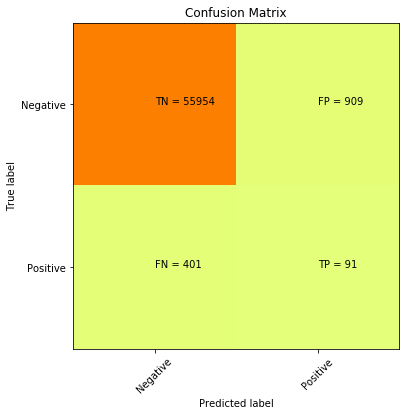

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     56863
           1       0.09      0.18      0.12       492

   micro avg       0.98      0.98      0.98     57355
   macro avg       0.54      0.58      0.56     57355
weighted avg       0.99      0.98      0.98     57355



In [92]:
data_final = data2 #_tst2
free_energy2 = rbm.free_energy_calc(test_set)



data_final['free_energy'] = np.array(free_energy.reshape(-1,1))
t = pd.DataFrame(data_final['free_energy'])
t['ind'] = X_test.index
data_final['isFraudRBM'] = 0 #np.zeros(len(data_std))
#data_final.loc[t.sort_values(by=0, ascending=False).head(1000).ind.values,:]['isFraudRBM'] = 1 #
data_final['isFraudRBM'][t.sort_values('free_energy', ascending=False).head(1000).ind.values] = 1

conf_matrix(data_final['isFraudRBM'])
#visualisation_2D(data_final['isFraudNN'])
print(classification_report(data_final.Class, data_final['isFraudRBM']))